<a href="https://colab.research.google.com/github/laxmivaishnavee22/OasisInfobyte/blob/main/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (3).zip to archive (3) (2).zip


In [ ]:
with ZipFile("archive (3).zip", "r") as zip_ref:
    zip_ref.extractall("wine_data")

In [ ]:
data = pd.read_csv("wine_data/WineQT.csv")

In [ ]:
print("Dataset shape:", data.shape)
print("\nData columns:\n", data.columns)
print("\nMissing values:\n", data.isnull().sum())

Dataset shape: (1143, 13)

Data columns:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


/tmp/ipython-input-1287356639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=data, palette="viridis")


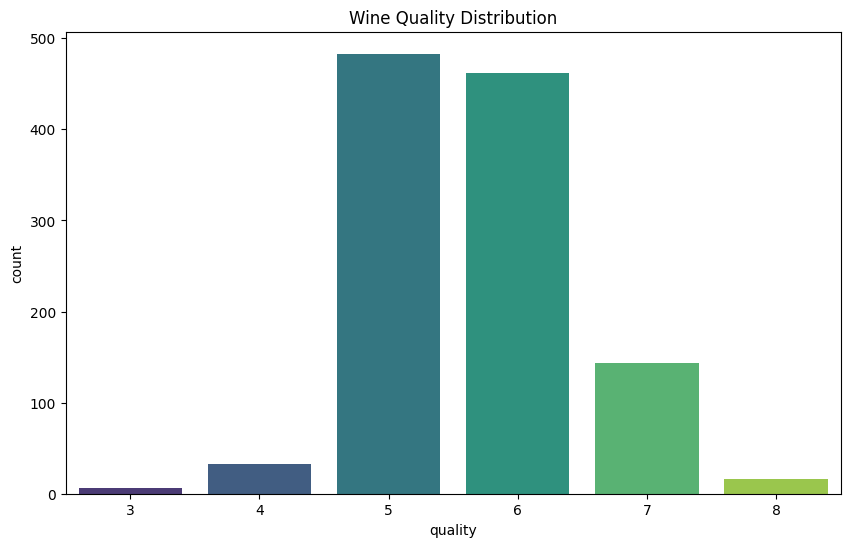

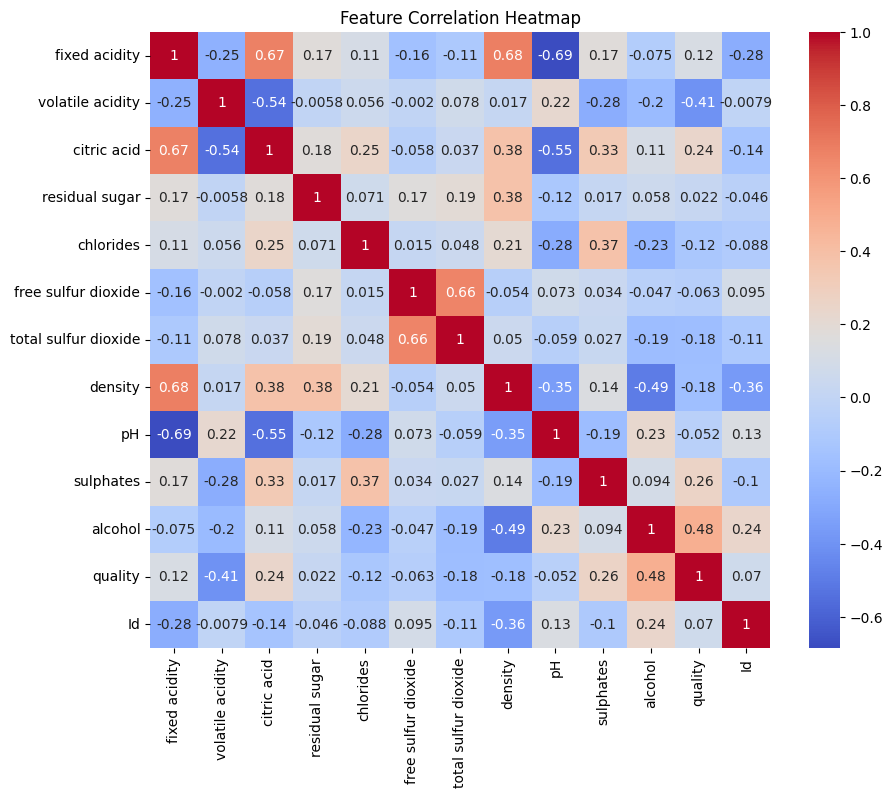

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="quality", data=data, palette="viridis")
plt.title("Wine Quality Distribution")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train_scaled, y_train)
sgd_pred = sgd.predict(X_test_scaled)

In [ ]:
svc = SVC(kernel="rbf", random_state=42)
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict(X_test_scaled)

In [ ]:
models = {
    "Random Forest": rf_pred,
    "SGD Classifier": sgd_pred,
    "Support Vector Classifier": svc_pred
}

for name, pred in models.items():
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))


=== Random Forest ===
Accuracy: 0.6812227074235808
Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 69  5  1]
 [ 0  0 11 15  0]
 [ 0  0  2  0  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229


=== SGD Classifier ===
Accuracy: 0.5851528384279476
Confusion Matrix:
 [[ 0  2  4  0  0]
 [ 0 75 12  8  1]
 [ 0 31 39 29  0]
 [ 0  2  4 20  0]
 [ 0  0  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

/tmp/ipython-input-3037335900.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="coolwarm")


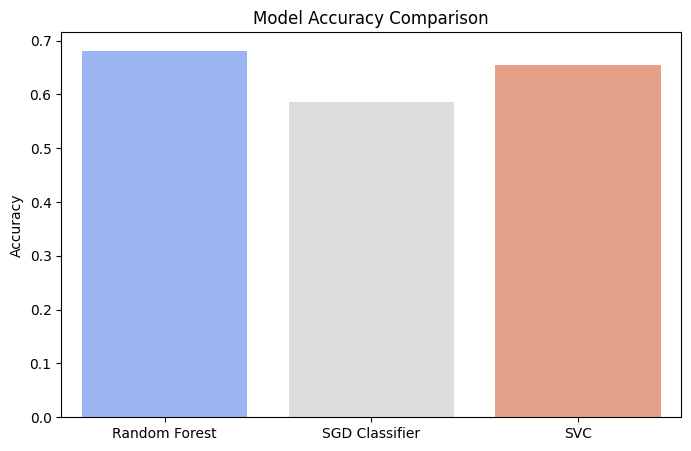

In [ ]:
accuracies = {
    "Random Forest": accuracy_score(y_test, rf_pred),
    "SGD Classifier": accuracy_score(y_test, sgd_pred),
    "SVC": accuracy_score(y_test, svc_pred)
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()